# Climate Analysis and Exploration Assignment

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area.

### Load Modules, Define File Path and Create Engine

In [1]:
# Load Modules

%matplotlib inline
# Customizable style sheets and parameters for matplotlib
from matplotlib import style
style.use('fivethirtyeight')
# Plot generator for bar, pie, line, scatter, box and other plots
import matplotlib.pyplot as plt
# High-level math and basic algebra computing tool
import numpy as np
# Dataframe generator that prints out various types of datasets
import pandas as pd
# Date and time attributes such as year, month, day, hour, minute, second 
import datetime as dt

In [2]:
# Load Modules

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
# File Path

# Define variable that represents the file path location
sqlite_file_path = "Resources/hawaii.sqlite"

In [4]:
# Create Engine

# Define variable that holds the create engine function to read sqlite file
sqlite_engine = create_engine(f"sqlite:///{sqlite_file_path}")

### Reflect Tables, Detect Classes and Identify Columns into SQLAlchemy ORM

In [5]:
# Reflect Tables

# Define the automap variable to be used in the table reflect
base = automap_base()
# Reflect the tables from within the .sqlite file
base.prepare(sqlite_engine, reflect=True)

In [6]:
# Detect Classes

# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Define Classes

# Define variable that references each found class name
Measurement = base.classes.measurement
Station = base.classes.station

In [10]:
# Identify Columns

# Define variable for inspect function to get column names from dataset
inspector = inspect(sqlite_engine)
inspector.get_table_names()

# Define variable that returns the columns names and types for the 'Measurement' class
measurement_column_names = inspector.get_columns('Measurement')
for column in measurement_column_names:
    print(column['name'], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Identify Columns

# Define variable that returns the columns names and types for the 'Station' class
station_column_names = inspector.get_columns('Station')
for column in station_column_names:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Identify Format

# Investigate the dataset to see how the data is presented
sqlite_engine.execute('SELECT * FROM Measurement LIMIT 4').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0)]

In [14]:
# Start Session

# Create our session (link) from Python to the DB
session = Session(sqlite_engine)

### Queries: Exploratory Precipitation Analysis

In [15]:
# Specific Query

# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [16]:
# Specific Query

# Define variable that finds the date one year ago to the day from the most recent date in the dataset
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [17]:
# Specific Query

# Define variable that represents the query of the last 12 months of Percipitation data
last_years_precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()
# print(last_years_percipitation_data)

In [18]:
# Specific Query

# Define variable that represents a query to retrieve all the data and precipitation scores
total_scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()
# print(total_scores)

In [19]:
# Create Dataframe

# Define variable and save the query results as a Pandas DataFrame
precipitation_dataframe = pd.DataFrame(last_years_precipitation_data, columns=["Date","Precipitation"])
# precipitation_dataframe.head()

In [20]:
# Set Index

# Set the dataframes index to the date column
precipitation_dataframe.set_index("Date", inplace=True,)
# precipitation_dataframe.head()

In [21]:
# Sort Dataframe

# Take the previously defined variable and sort the dataframe by date
precipitation_dataframe = precipitation_dataframe.sort_values(by='Date')
precipitation_dataframe.head()

Precipitation
Date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23            NaN
2016-08-23           0.02

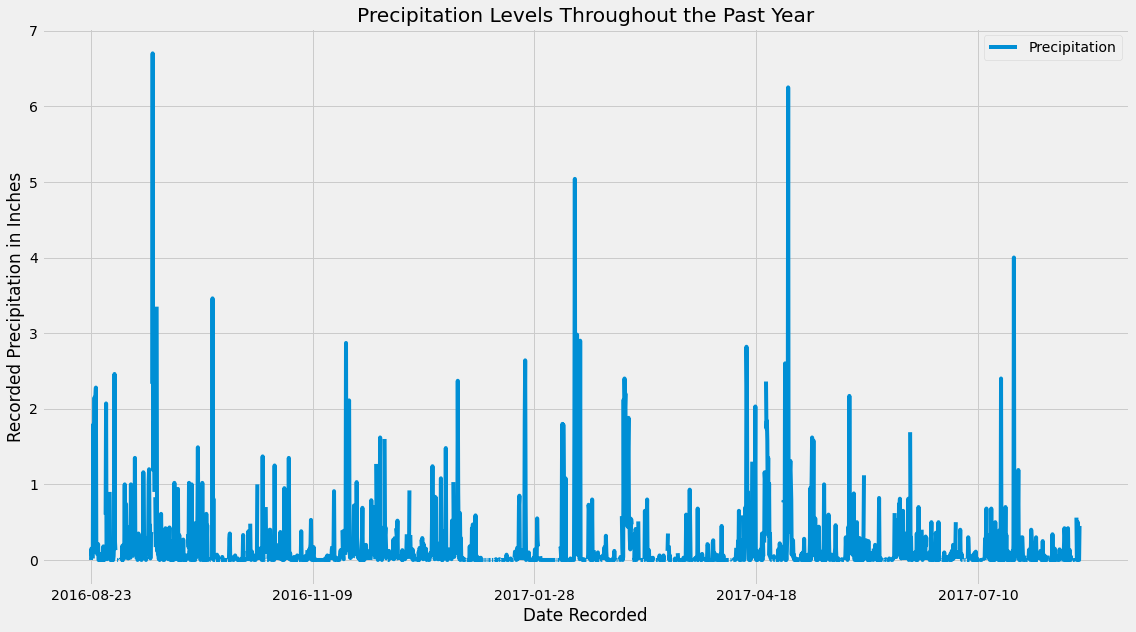

In [30]:
# Create Plot

# Use Pandas Plotting with Matplotlib and create a bar chart plot of the percipitation data
fig, ax = plt.subplots(figsize = (16, 9))
precipitation_dataframe.plot(ax = ax, x_compat = True)

# Create a unique 'Title' for the chart as well as x and y labels
ax.set_xlabel('Date Recorded')
ax.set_ylabel('Recorded Precipitation in Inches')
ax.set_title("Precipitation Levels Throughout the Past Year")

#plt.savefig("Images/precipitation.png")

plt.tight_layout()
plt.show()

## " Referenced" https://github.com/djcim402/Surfs-Up-SQLAlchemy-Homework/blob/master/climate_starter.ipynb ##

In [32]:
# Summarize Stats

# With the previously defined Pandas Datafrme, calcualte the summary statistics for the precipitation data
precipitation_dataframe.describe()

Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

### Queries: Exploratory Station Analysis

In [34]:
# Specific Query

# Define variable that calculates the total number weather stations in the dataset
total_weather_stations = session.query(Measurement.station).distinct().count()
total_weather_stations

9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()